In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df_train = pd.read_csv('../kaggle-quora/data/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total num. of unique questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}' \
      .format(np.sum(qids.value_counts() > 1)))

# plt.figure(figsize=(12, 5))
# plt.hist(qids.value_counts(), bins=50)
# plt.yscale('log', nonposy='clip')
# plt.title('Log-Histogram of question appearance counts')
# plt.xlabel('Number of occurences')
# plt.ylabel('Number of questions')
# plt.show()

Duplicate pairs: 36.92%
Total num. of unique questions in the training data: 537933
Number of questions that appear multiple times: 111780


In [6]:
df_test = pd.read_csv('../kaggle-quora/data/test.csv')
print(df_test.head())
print(df_test.tail())

   test_id                                          question1  \
0        0  How does the Surface Pro himself 4 compare wit...   
1        1  Should I have a hair transplant at age 24? How...   
2        2  What but is the best way to send money from Ch...   
3        3                        Which food not emulsifiers?   
4        4                   How "aberystwyth" start reading?   

                                           question2  
0  Why did Microsoft choose core m3 and not core ...  
1        How much cost does hair transplant require?  
2                      What you send money to China?  
3                                  What foods fibre?  
4                     How their can I start reading?  
         test_id                                          question1  \
2345791  2345791  How do Peaks (TV series): Why did Leland kill ...   
2345792  2345792  What does be "in transit" mean on FedEx tracking?   
2345793  2345793  What are some famous Romanian drinks (alcoholi..

In [7]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


In [9]:
pal = sns.color_palette()

train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train_char = train_qs.apply(len)
dist_test_char = test_qs.apply(len)
# plt.figure(figsize=(15, 10))
# plt.hist(dist_train_char, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
# plt.hist(dist_test_char, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
# plt.title('Normalised histogram of character count in questions', fontsize=15)
# plt.legend()
# plt.xlabel('Number of characters', fontsize=15)
# plt.ylabel('Normalized Count', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train_char.mean(), 
                          dist_train_char.std(), dist_test_char.mean(), dist_test_char.std(), dist_train_char.max(), dist_test_char.max()))

mean-train 59.86 std-train 31.99 mean-test 60.11 std-test 31.66 max-train 1169.00 max-test 1176.00


In [10]:
dist_train_words = train_qs.apply(lambda x: len(x.split(' ')))
dist_test_words = test_qs.apply(lambda x: len(x.split(' ')))

# plt.figure(figsize=(15, 10))
# plt.hist(dist_train_words, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
# plt.hist(dist_test_words, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
# plt.title('Normalised histogram of word count in questions', fontsize=15)
# plt.legend()
# plt.xlabel('Number of words', fontsize=15)
# plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train_words.mean(), 
                          dist_train_words.std(), dist_test_words.mean(), dist_test_words.std(), dist_train_words.max(), dist_test_words.max()))

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# A simple word share to compare questions 1 and questions 2

In [11]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = 1.000 * (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

In [12]:
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
# plt.figure(figsize=(15, 5))
# plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
# plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
# plt.legend()
# plt.title('Label distribution over word_match_share', fontsize=15)
# plt.xlabel('word_match_share', fontsize=15)

# Using custom made TF-IDF.

In [13]:
from collections import Counter

words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
counts

Counter({'considered,': 1,
         'considered.': 1,
         'pieces/rest': 1,
         'distributers': 1,
         'daiict': 3,
         'sunflowers?': 4,
         'throwaround': 1,
         'telepat.io?': 3,
         'considered?': 19,
         'woods': 18,
         'spiders': 79,
         'campari?': 1,
         'paiza': 1,
         'woody': 11,
         'sunflowers,': 1,
         'do/while': 1,
         'regularize': 1,
         "'guess'": 1,
         "'context": 1,
         '"ipod"?': 1,
         'funforlouis': 1,
         'shadowdancer': 1,
         'rickman': 3,
         '"epitome': 1,
         "propeller's": 1,
         'naturopathic': 1,
         'nature)?': 3,
         'gnetophyta?': 1,
         'wood,': 3,
         'plasticine?': 1,
         'wood.': 1,
         'pigment': 3,
         'tourister': 10,
         'gazatted': 1,
         'spider?': 23,
         'wood:': 1,
         'bringing': 182,
         'wood?': 58,
         'kaushal': 1,
         'grueling': 1,
         '

In [14]:
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1.0000 / (count + eps)

In [15]:
weights = {word: get_weight(count) for word, count in counts.items()}
weights

{'considered,': 0,
 'considered.': 0,
 'pieces/rest': 0,
 '(nfl)': 0,
 'daiict': 9.997000899730081e-05,
 'sunflowers?': 9.996001599360256e-05,
 'throwaround': 0,
 'telepat.io?': 9.997000899730081e-05,
 'considered?': 9.981036031540073e-05,
 'woods': 9.982032341784787e-05,
 'spiders': 9.921619208254787e-05,
 'campari?': 0,
 'paiza': 0,
 'woody': 9.989012086704625e-05,
 'sunflowers,': 0,
 'do/while': 0,
 'regularize': 0,
 "'guess'": 0,
 "'context": 0,
 '"ipod"?': 0,
 'hallucinate': 9.995002498750625e-05,
 'shadowdancer': 0,
 'rickman': 9.997000899730081e-05,
 '"epitome': 0,
 'statute': 9.984025559105431e-05,
 "propeller's": 0,
 'naturopathic': 0,
 'nature)?': 9.997000899730081e-05,
 'gnetophyta?': 0,
 'wood,': 9.997000899730081e-05,
 'trojan': 9.982032341784787e-05,
 'wood.': 0,
 'pigment': 9.997000899730081e-05,
 'tourister': 9.99000999000999e-05,
 'gazatted': 0,
 'spider?': 9.977052778609199e-05,
 'wood:': 0,
 'screaming': 9.989012086704625e-05,
 'wood?': 9.942334460131238e-05,
 'kaush

In [16]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('chameleons', 9.998000399920016e-05),
 ('275', 9.998000399920016e-05),
 ('276', 9.998000399920016e-05),
 ('kid:', 9.998000399920016e-05),
 ('usenet', 9.998000399920016e-05),
 ('(football', 9.998000399920016e-05),
 ('dittofish?', 9.998000399920016e-05),
 ('sneha', 9.998000399920016e-05),
 ('population)', 9.998000399920016e-05),
 (',delhi', 9.998000399920016e-05)]

In [17]:
len(weights)

201105

In [18]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] \
                   + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + \
                    [weights.get(w, 0) for w in q2words]
    

    try:
        R = 1.00000* np.sum(shared_weights) / np.sum(total_weights)
    except ZeroDivisionError:
        R = 0
    return R

In [19]:
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
tfidf_train_word_match

/Library/Python/2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


0         0.772164
1         0.361758
2         0.355191
3         0.000000
4         0.000000
5         0.510771
6         0.000000
7         0.645836
8         0.396755
9         0.503203
10        0.000000
11        0.654071
12        1.000000
13        0.536457
14        0.804625
15        0.307390
16        0.536711
17        0.000000
18        0.532416
19        0.488021
20        0.589277
21        0.000000
22        0.652711
23        0.000000
24        0.000000
25        0.720855
26        0.353365
27        0.000000
28        0.762706
29        0.527833
            ...   
404260    0.382804
404261    0.578849
404262    0.668261
404263    0.330545
404264    0.249702
404265    0.346612
404266    0.166106
404267    0.826632
404268    0.000000
404269    0.755497
404270    0.228984
404271    0.000000
404272    0.382578
404273    0.583512
404274    0.368606
404275    0.000000
404276    0.000000
404277    0.000000
404278    0.259237
404279    0.369876
404280    0.904533
404281    0.

In [20]:
# plt.figure(figsize=(15, 5))
# plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
# plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
# plt.legend()
# plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
# plt.xlabel('word_match_share', fontsize=15)

In [21]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

('Original AUC:', 0.78055320062812139)
('   TFIDF AUC:', 0.77056665661851498)


# Using sklearn TF-IDF and do some pre-cleaning.

In [22]:
import re

def questions_to_words( raw_review ):
    ''' Convert questions to words using regular expresssion, \
    removing stopwrods, and keep only alphabets'''

    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [23]:
train_qs.shape[0]

808580

In [24]:
print("Cleaning and parsing the training set movie reviews...\n")
clean_train_reviews = []
for i in range( 0, train_qs.shape[0]):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print("Review %d of %d\n" % ( i+1, train_qs.shape[0] ))
    clean_train_reviews.append( questions_to_words( train_qs[i] ))

Cleaning and parsing the training set movie reviews...

Review 1000 of 808580

Review 2000 of 808580

Review 3000 of 808580

Review 4000 of 808580

Review 5000 of 808580

Review 6000 of 808580

Review 7000 of 808580

Review 8000 of 808580

Review 9000 of 808580

Review 10000 of 808580

Review 11000 of 808580

Review 12000 of 808580

Review 13000 of 808580

Review 14000 of 808580

Review 15000 of 808580

Review 16000 of 808580

Review 17000 of 808580

Review 18000 of 808580

Review 19000 of 808580

Review 20000 of 808580

Review 21000 of 808580

Review 22000 of 808580

Review 23000 of 808580

Review 24000 of 808580

Review 25000 of 808580

Review 26000 of 808580

Review 27000 of 808580

Review 28000 of 808580

Review 29000 of 808580

Review 30000 of 808580

Review 31000 of 808580

Review 32000 of 808580

Review 33000 of 808580

Review 34000 of 808580

Review 35000 of 808580

Review 36000 of 808580

Review 37000 of 808580

Review 38000 of 808580

Review 39000 of 808580

Review 40000 of 8

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("Creating the bag of words...\n")

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_df = 0.9, \
                             min_df = 2, \
                             max_features = 200000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
# train_data_features = train_data_features.toarray()
train_data_features

Creating the bag of words...



<808580x48595 sparse matrix of type '<type 'numpy.float64'>'
	with 4191515 stored elements in Compressed Sparse Row format>

In [26]:
sk_weights = vectorizer.vocabulary_
sk_weights

{u'daiict': 10444,
 u'gag': 16901,
 u'woods': 47805,
 u'spiders': 40647,
 u'hanging': 18698,
 u'woody': 47810,
 u'localized': 25102,
 u'disobeying': 12164,
 u'refunding': 35822,
 u'rickman': 36760,
 u'pigment': 32483,
 u'tourister': 44084,
 u'replaces': 36235,
 u'bringing': 5599,
 u'kaushal': 23180,
 u'vibrational': 46378,
 u'wooden': 47800,
 u'wednesday': 47251,
 u'chameleons': 7115,
 u'crotch': 10007,
 u'thrace': 43517,
 u'mormonthink': 28034,
 u'desiccant': 11414,
 u'selassie': 38469,
 u'consenting': 9021,
 u'inanimate': 20880,
 u'errors': 14340,
 u'starboy': 41046,
 u'warmongering': 47016,
 u'usenet': 45828,
 u'designing': 11425,
 u'numeral': 29839,
 u'quaro': 34727,
 u'trivikram': 44540,
 u'bhubaneshwar': 4450,
 u'brainwashed': 5418,
 u'affiliates': 799,
 u'evolutionist': 14646,
 u'quart': 34732,
 u'kids': 23440,
 u'uplifting': 45700,
 u'controversy': 9264,
 u'neurologist': 29161,
 u'topography': 43970,
 u'projection': 34005,
 u'stern': 41234,
 u'sneha': 40038,
 u'dnd': 12432,
 u'

In [27]:
def sklearn_tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    
    shared_weights = [sk_weights.get(w, 0) for w in q1words.keys() if w in q2words] \
                   + [sk_weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [sk_weights.get(w, 0) for w in q1words] + \
                    [sk_weights.get(w, 0) for w in q2words]
    
    try:
        R = 1.00000 * np.sum(shared_weights) / np.sum(total_weights)
    except ZeroDivisionError:
        R = 0
    
    return R

In [28]:
sk_tfidf_train_word_match = df_train.apply(sklearn_tfidf_word_match_share, axis=1, raw=True)
sk_tfidf_train_word_match

/Library/Python/2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


0         0.901830
1         0.191605
2         0.519395
3         0.000000
4         0.000000
5         0.602577
6         0.000000
7         0.000000
8         1.000000
9         0.796954
10        0.000000
11        0.519143
12        1.000000
13        0.880059
14        1.000000
15        0.478724
16        1.000000
17        0.000000
18        0.431667
19        0.662909
20        0.546081
21        0.000000
22        0.070463
23        0.000000
24        0.000000
25        0.947420
26        0.977579
27        0.000000
28        0.847898
29        0.639023
            ...   
404260    0.923715
404261    0.831325
404262    0.521105
404263    0.287301
404264    0.497948
404265    0.358458
404266    0.239410
404267    0.775304
404268    0.000000
404269    0.567428
404270    1.000000
404271    0.000000
404272    0.356448
404273    0.451996
404274    0.408700
404275    0.000000
404276         NaN
404277    0.000000
404278    0.527884
404279    0.182764
404280    0.841192
404281    0.

In [29]:
# plt.figure(figsize=(15, 5))
# plt.hist(sk_tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
# plt.hist(sk_tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
# plt.legend()
# plt.title('Label distribution over SKLEARN tfidf_word_match_share', fontsize=15)
# plt.xlabel('word_match_share', fontsize=15)

In [30]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))
print('SKLEARN TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], sk_tfidf_train_word_match.fillna(0)))

('Original AUC:', 0.78055320062812139)
('   TFIDF AUC:', 0.77056665661851498)
('SKLEARN TFIDF AUC:', 0.70689963913038989)


# Save the features

In [31]:
features = pd.DataFrame()

features['word_match'] = train_word_match
features['tfidf_word_match'] = tfidf_train_word_match
features['sk_tfidf_word_match'] = sk_tfidf_train_word_match
features.to_csv('./tf_idf_word_share.csv')

# Rebalance the data.

In [71]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()

x_train['word_match'] = train_word_match
# x_train['tfidf_word_match'] = tfidf_train_word_match
# x_train['sk_tfidf_word_match'] = sk_tfidf_train_word_match

x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
# x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)
# x_test['sk_tfidf_word_match'] = df_test.apply(sklearn_tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

In [72]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -= 1
print('scale: ', scale, ', len(neg_train): ', len(neg_train))
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

('scale: ', -1.0, ', len(neg_train): ', 255027)
0


# Train / Validation Split

In [73]:
# Finally, we split some of the data off for validation
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

# Using only shared word feature

In [36]:
import xgboost as xgb

# Set our parameters for xgboost
# params = {}
# params['objective'] = 'binary:logistic'
# params['eval_metric'] = 'logloss'
# params['eta'] = 0.02
# params['max_depth'] = 4

# d_train = xgb.DMatrix(x_train, label=y_train)
# d_valid = xgb.DMatrix(x_valid, label=y_valid)

# watchlist = [(d_train, 'train'), (d_valid, 'valid')]

# bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

# Using shared word + custom tf-idf features + sklearn tf-idf features

In [77]:
import time

time_start = time.time()
### Step 1: Create dataframe with desired features ###
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()

x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_train['sk_tfidf_word_match'] = sk_tfidf_train_word_match

x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)
x_test['sk_tfidf_word_match'] = df_test.apply(sklearn_tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

### Step 2: Re-balance the data ###
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -= 1
print('scale: ', scale, ', len(neg_train): ', len(neg_train))
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

### Step 3: train/validation split ###
# Finally, we split some of the data off for validation
x_train, x_valid, y_train, y_valid = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=4242)
    
### Step 4: xgb training ###
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

# bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

time_end = time.time()
print 'Total time: ', time_end - time_start

/Library/Python/2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars
/Library/Python/2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


('scale: ', -1.0, ', len(neg_train): ', 255027)
0
Total time:  471.25956583


In [79]:
x_train.head()

,word_match,tfidf_word_match,sk_tfidf_word_match
107566,1.000000,1.000000,1.000000
150920,0.727273,0.768967,0.450285
335233,0.400000,0.395250,0.413189
302735,0.352941,0.342702,0.348979
363023,0.285714,0.302993,0.654963


# Tuned xgb params by David Solis

In [80]:
%time

params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.11
params['max_depth'] = 5

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs


# Use cross validation to check the performance.

In [82]:
time_start = time.time()

model_cv = xgb.cv(params, \
                  d_train, \
                  1000, \
                  nfold=3, \
                  metrics='logloss', \
                  early_stopping_rounds=50, \
                  verbose_eval=10)

time_end = time.time()
print 'Total time: ', time_end - time_start

[0]	train-logloss:0.655546+9.16564e-05	test-logloss:0.655588+7.95669e-05
[10]	train-logloss:0.501523+0.000375022	test-logloss:0.501969+0.000627083
[20]	train-logloss:0.466685+0.000509379	test-logloss:0.467398+0.000852321
[30]	train-logloss:0.456429+0.000514036	test-logloss:0.457432+0.000991269
[40]	train-logloss:0.452643+0.000453545	test-logloss:0.453958+0.0011722
[50]	train-logloss:0.450809+0.000455576	test-logloss:0.452421+0.0012436
[60]	train-logloss:0.449627+0.000411023	test-logloss:0.451569+0.00126667
[70]	train-logloss:0.448591+0.000435667	test-logloss:0.450909+0.0012406
[80]	train-logloss:0.447511+0.000427763	test-logloss:0.450256+0.0012611
[90]	train-logloss:0.446618+0.000526098	test-logloss:0.449821+0.00116435
[100]	train-logloss:0.445836+0.000397332	test-logloss:0.44947+0.00128567
[110]	train-logloss:0.445158+0.00040465	test-logloss:0.449212+0.00127225
[120]	train-logloss:0.444465+0.000468584	test-logloss:0.448885+0.00123871
[130]	train-logloss:0.443831+0.000385489	test-loglo

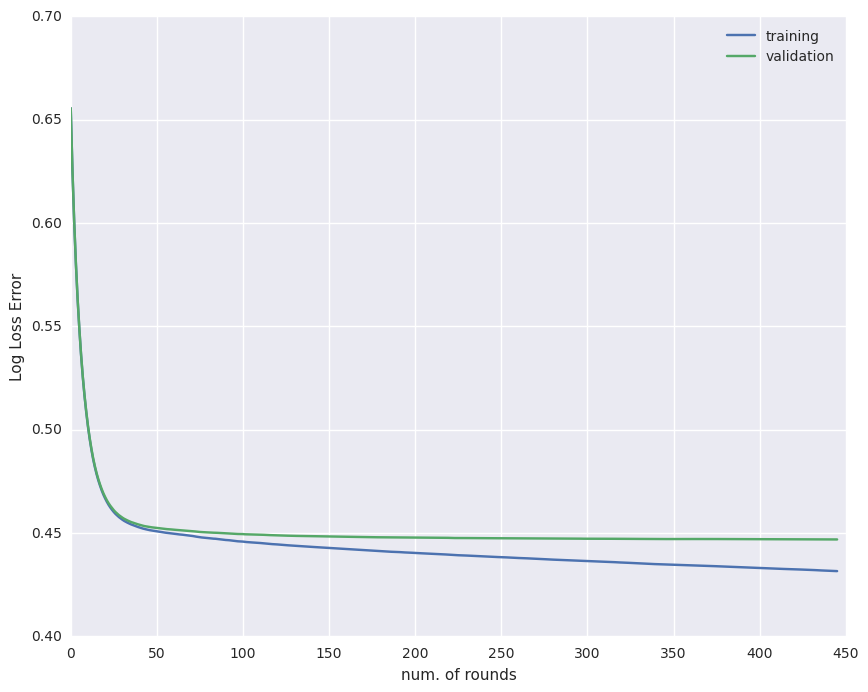

In [84]:
plt.figure(figsize=(10,8))
plt.plot(model_cv['train-logloss-mean'], label='training')
plt.plot(model_cv['test-logloss-mean'], label='validation')
# plt.xlim(200, 400)
# plt.ylim(0.3, 0.38)
plt.xlabel('num. of rounds')
plt.ylabel('Log Loss Error')
plt.legend()
plt.show()

In [81]:
time_start = time.time()

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
bst = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, verbose_eval=10)

time_end = time.time()
print 'Total time: ', time_end - time_start

[0]	train-logloss:0.655566	valid-logloss:0.655475
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.501699	valid-logloss:0.501203
[20]	train-logloss:0.466841	valid-logloss:0.466263
[30]	train-logloss:0.456705	valid-logloss:0.456226
[40]	train-logloss:0.452888	valid-logloss:0.452515
[50]	train-logloss:0.451053	valid-logloss:0.45085
[60]	train-logloss:0.449949	valid-logloss:0.449916
[70]	train-logloss:0.448775	valid-logloss:0.449018
[80]	train-logloss:0.447898	valid-logloss:0.448412
[90]	train-logloss:0.446906	valid-logloss:0.447748
[100]	train-logloss:0.446071	valid-logloss:0.447209
[110]	train-logloss:0.445359	valid-logloss:0.446785
[120]	train-logloss:0.444826	valid-logloss:0.44653
[130]	train-logloss:0.44438	valid-logloss:0.446456
[140]	train-logloss:0.443836	valid-logloss:0.446159
[150]	train-logloss:0.443387	valid-logloss:0.445942
[160]	train-logloss:0.442834	va

In [85]:
%timeit

model_val = bst.predict(xgb.DMatrix(x_valid))
model_val

array([  6.05960846e-01,   2.74615391e-04,   3.85629217e-04, ...,
         6.06557012e-01,   6.15855277e-01,   5.42998374e-01], dtype=float32)

In [86]:
from sklearn.metrics import log_loss

print((model_val))
print((np.array(y_valid)))
log_loss(np.array(y_valid), model_val)

[  6.05960846e-01   2.74615391e-04   3.85629217e-04 ...,   6.06557012e-01
   6.15855277e-01   5.42998374e-01]
[ 0.  0.  0. ...,  1.  0.  1.]


0.44390154493655259

In [87]:
model_test = bst.predict(xgb.DMatrix(x_test))

submission = pd.DataFrame()
submission['test_id'] = df_test['test_id']
submission['is_duplicate'] = model_test
submission.to_csv('three_features_xgb.csv', index=False)

In [46]:
submission.head()

,test_id,is_duplicate
0,0,0.429014
1,1,0.429014
2,2,0.429014
3,3,0.001440
4,4,0.367386
